In [1049]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xg
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.naive_bayes import GaussianNB

%matplotlib inline

from sklearn.preprocessing import normalize, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA

In [1032]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold

from sklearn.metrics import accuracy_score 

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_columns', None)
import seaborn as sns

from sklearn.metrics import mean_squared_error as rmse_error

# Function to calculate features for new games

- Imports the data
- Groupby Team with rolling averages
- re-sorts dataframe based on old index


# Reading in DF and reversing to run ML models

In [1612]:
#reading in pandas df
ml_df = pd.read_csv('data/ready_for_ml_7.csv')

#dropping 'Unnamed: 0' that should not be there
ml_df.drop('Unnamed: 0', inplace = True, axis = 1)



In [1613]:
#reversing the dataframe
ml_df = ml_df.iloc[::-1]


In [1614]:
#reseting the index and dropping the old index
ml_df.reset_index(inplace= True)
ml_df.drop('index', inplace = True, axis = 1)

ml_df.dropna(inplace = True)

In [1828]:
ml_df

,Team,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,+/-,Team_2,MIN_2,PTS_2,FGM_2,FGA_2,FG%_2,3PM_2,3PA_2,3P%_2,FTM_2,FTA_2,FT%_2,OREB_2,DREB_2,REB_2,AST_2,STL_2,BLK_2,TOV_2,PF_2,+/-_2,Total_pts,home,visitor,Open,Close,Open_2,Close_2,over_under,totals,kappa_1,kappa_2,kappa_3,k_1_under,k_1_over,k_2_under,k_2_over,k_3_under,k_3_over
113,IND,240.00,94.14,35.00,83.29,42.09,7.29,21.29,33.49,16.86,22.86,74.44,11.29,31.14,42.43,19.71,9.00,4.14,15.14,20.71,-3.43,ORL,250.71,103.43,39.86,91.00,43.90,7.57,22.57,34.59,16.14,20.57,78.30,11.14,34.86,46.00,23.43,8.14,6.71,15.86,23.29,1.14,181,IND,ORL,194.5,195,4,4,194.5,194.5,4.13165,6.197475,8.263299,190.0,199.0,188.0,201.0,186.0,203.0
122,NYK,240.00,100.14,36.00,87.14,41.30,7.00,22.71,31.61,21.14,25.86,81.76,13.43,32.43,45.86,20.14,7.29,5.14,14.43,22.86,-0.29,TOR,240.00,99.00,34.43,81.43,42.24,6.71,20.29,32.54,23.43,30.00,77.67,11.43,34.71,46.14,17.71,9.43,3.86,16.57,22.43,3.86,220,TOR,NYK,196,196.5,9,7.5,196.0,196.0,4.13165,6.197475,8.263299,192.0,200.0,190.0,202.0,188.0,204.0
123,NYK,240.00,100.14,36.00,87.14,41.30,7.00,22.71,31.61,21.14,25.86,81.76,13.43,32.43,45.86,20.14,7.29,5.14,14.43,22.86,-0.29,TOR,240.00,99.00,34.43,81.43,42.24,6.71,20.29,32.54,23.43,30.00,77.67,11.43,34.71,46.14,17.71,9.43,3.86,16.57,22.43,3.86,220,TOR,NYK,212,213.5,13,12.5,212.0,212.0,4.13165,6.197475,8.263299,208.0,216.0,206.0,218.0,204.0,220.0
125,TOR,240.00,99.43,34.57,82.00,42.10,6.29,20.14,30.34,24.00,30.00,79.14,12.14,33.86,46.00,18.57,9.29,4.43,15.29,21.43,2.57,PHI,240.00,91.43,33.86,81.57,41.40,7.43,24.29,31.31,16.29,23.14,71.09,10.71,32.29,43.00,19.71,6.71,6.86,18.00,19.43,-13.29,222,PHI,TOR,10.5,9.5,192.5,196.5,10.5,10.5,4.13165,6.197475,8.263299,6.0,15.0,4.0,17.0,2.0,19.0
127,LAL,240.00,102.00,35.14,85.57,41.17,9.00,28.57,32.16,22.71,29.00,77.03,8.71,32.57,41.29,18.29,7.00,6.00,14.29,23.43,-7.29,ORL,250.71,103.00,39.00,87.86,44.29,8.29,23.57,36.17,16.71,21.29,78.86,9.71,34.57,44.29,22.86,8.14,6.29,16.71,23.00,-0.57,200,ORL,LAL,202,201.5,7.5,8,202.0,202.0,4.13165,6.197475,8.263299,198.0,206.0,196.0,208.0,194.0,210.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7276,UTA,243.57,119.14,40.86,89.29,45.84,16.71,42.71,38.99,20.71,26.29,78.73,11.00,35.57,46.57,22.71,7.71,5.43,15.14,20.00,-1.14,CHI,243.57,108.86,41.29,89.57,46.14,13.57,34.71,40.04,12.71,15.71,83.87,11.14,36.71,47.86,27.43,6.00,4.71,16.43,19.43,2.00,215,CHI,UTA,8.5,9.5,231,227.5,8.5,231.0,4.13165,6.197475,8.263299,227.0,235.0,225.0,237.0,223.0,239.0
7277,BOS,240.00,114.57,43.43,88.86,49.17,14.14,37.00,38.17,13.57,18.86,76.07,11.43,32.57,44.00,24.57,8.00,5.86,13.29,20.14,1.71,MEM,240.00,107.57,40.14,89.86,44.56,8.86,28.00,32.03,18.43,24.14,78.74,10.43,37.00,47.43,24.43,8.14,4.14,13.43,19.29,-2.29,258,MEM,BOS,221.5,218.5,1,4.5,221.5,221.5,4.13165,6.197475,8.263299,217.0,226.0,215.0,228.0,213.0,230.0
7278,HOU,240.00,103.43,38.57,91.00,42.74,11.29,38.43,29.47,15.00,22.43,69.23,10.29,31.43,41.71,21.57,7.57,4.71,13.57,18.71,-14.71,TOR,240.00,110.43,38.86,91.00,42.81,16.14,44.00,36.79,16.57,20.86,79.86,9.00,28.29,37.29,26.29,8.29,4.43,12.86,24.00,-8.43,216,HOU,TOR,8.5,8.5,223.5,225.5,8.5,223.5,4.13165,6.197475,8.263299,219.0,228.0,217.0,230.0,215.0,232.0
7279,IND,243.57,113.14,42.29,89.43,47.46,13.71,36.86,37.43,14.86,18.71,78.29,9.43,32.43,41.86,28.00,8.71,6.29,15.29,20.29,0.29,MIL,243.57,118.57,43.57,92.43,47.20,12.86,37.43,34.47,18.57,22.29,84.79,9.86,39.43,49.29,25.71,7.86,4.29,15.43,16.57,4.43,253,MIL,IND,232,232.5,10,6.5,232.0,232.0,4.13165,6.197475,8.263299,228.0,236.0,226.0,238.0,224.0,240.0


# Creating the X variable for our features and the y for your target variable

In [1876]:
X = ml_df[['PTS', 'FGM', 'FGA', 'FG%','3PA', '3P%', 'FTM',
       'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       '+/-', 'PTS_2', 'FGM_2', 'FGA_2', 'FG%_2',
       '3PM_2', '3PA_2', '3P%_2', 'FT%_2', 'OREB_2',
       'DREB_2', 'REB_2', 'AST_2', 'STL_2', 'BLK_2', 'TOV_2', 'PF_2', '+/-_2']]

#creating the y (target variable)
y = ml_df['Total_pts']


# Scaling the data
- Importing Robust Scaler 

In [1877]:
## scale the features
scaler = RobustScaler()
x_scaled = scaler.fit_transform(X)


# Performing PCA for EDA on the scaled DATA

- Did not effect our results when limiting our features based on our findings while doing PCA

In [1045]:
## keep 25 components

x_pca = PCA(25).fit_transform(x_scaled)
pca_df = pd.DataFrame(x_pca)
pca_df

# train_test_split

In [1878]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# initial testing of random forest 

In [1054]:
## create our model RMSE scorer
scorer = make_scorer(rmse_error)

In [1055]:
## print score
rf = RandomForestRegressor()
print('Average Random Forest RMSE: {}'.format((cross_val_score(rf, x_pca, y, scoring=scorer)).mean()))

Average Random Forest RMSE: 360.50873406012715


# Using GridSearch CV to finds best Params for Random Forest

In [1798]:
n_estimators= [50,75, 100, 150, 200, 250] 
min_weight_fraction_leaf = [.2, 0.1,0.05,0.02,0]
max_depth =   [11,12,13,14,15,16 ]
min_samples_split= [.1,.2,.3,.4,.5,.6]
min_samples_leaf=  [2,4,6] 
max_features=   ['auto', 1, 3, 5, 10] 
seed = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]


rf = RandomForestRegressor(n_estimators = 250, min_samples_leaf =2,max_features=10, random_state=8, n_jobs=-1) 
rf_fit = rf.fit(X_train, y_train)
y_pred = rf_fit.predict(X_test)




print (mean_absolute_error(y_test, y_pred))
print (rmse_error(y_test, y_pred))


# #running my initial regression
# rf = RandomForestRegressor()
# rf_fit = rf.fit(X_train, y_train)
# y_pred = rf_fit.predict(X_test)


# rmse 7 day = rmse 329.0529990915444
# rmse 7 day= RMSE 324.7166287794798



# #running my initial regression
# rf = RandomForestRegressor()
# rf_fit = rf.fit(X_train, y_train)
# y_pred = rf_fit.predict(X_test)


# rmse 7 day = rmse 329.0529990915444
# rmse 7 day


13.569006012738718
324.58860037147485


In [1799]:
rmse = rmse_error(y_test, y_pred)
rmse

324.58860037147485

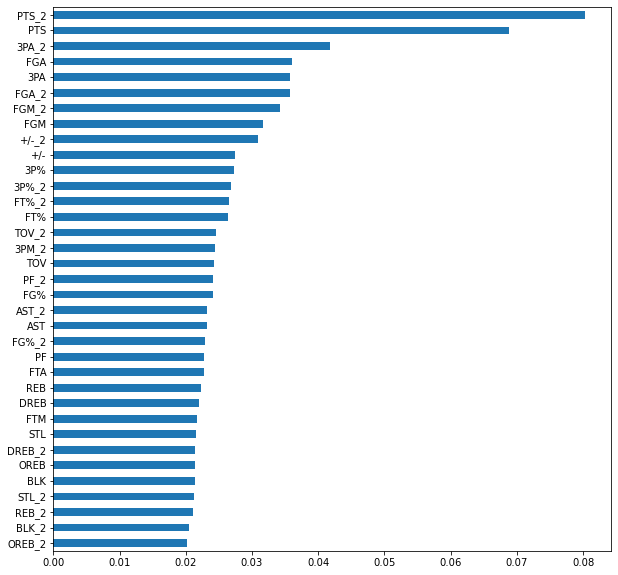

In [1690]:
#graphing to see some of the feature importance
rf_fit.feature_importances_

feature_importance = pd.Series(rf_fit.feature_importances_, index= X_feature_red.columns)
feature_importance.sort_values(inplace = True)
feature_importance.plot(kind = 'barh', figsize=(10,10))

# Prints out our winnig percentage for our prediction

In [1742]:
acc_list = []
zipped = zip(compare_df['Total_pts_x'], compare_df['predicted'], compare_df['totals'])
for x in zipped:
    if x[0] > x[2] and x[1] > x[2]:
        acc_list.append('over')
    if x[0] < x[2] and x[1] < x[2]:
        acc_list.append('under')
    else:
        acc_list.append('lost')
        
lost = []
for item in acc_list:
    if item == 'lost':
        lost.append(item)
    
print ((len(acc_list) - len(lost)) / len(acc_list))

0.43385109801821103


# initial testing of gradient boost 

In [1787]:
gb = GradientBoostingRegressor(learning_rate=0.05, max_depth=4, max_features='auto',
                          min_samples_leaf=2, n_estimators=50)
gb_fit = gb.fit(X_train, y_train)
y_pred = gb_fit.predict(X_test)

In [1788]:
rmse = rmse_error(y_test, y_pred)
rmse


350.2931003568681

In [1786]:
#calculate winning percentage based on both the target and predicted score are on the same side of the spread Over/Under
acc_list = []
zipped = zip(compare_df['Total_pts_x'], compare_df['predicted'], compare_df['totals'])
for x in zipped:
    
    if x[0] > x[2] and x[1] > x[2]:
        acc_list.append('over')
    if x[0] < x[2] and x[1] < x[2]:
        acc_list.append('under')
    else:
        acc_list.append('lost')
    
lost = []
for item in acc_list:
    if item == 'lost':
        lost.append(item)

print ((len(acc_list) - len(lost)) / len(acc_list))

0.43270777479892764


In [1165]:
ml_df['totals'].value_counts()

220.0     151
208.0     149
218.0     140
221.0     139
214.0     138
         ... 
246.0       1
1955.5      1
246.5       1
17.5        1
247.5       1
Name: totals, Length: 138, dtype: int64

# Implementing a grid search to include cross val

In [566]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold


#maybe use this for cross val later
#from sklearn.model_selection import cross_val_score
#all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)

In [1583]:
param_grid={'n_estimators':[50,75, 100, 150, 200, 250], 
            'learning_rate': [.2, 0.1,0.05,0.02],
            'max_depth':[4 ], 
            'min_samples_leaf': [2,4,6], 
            'max_features':['auto', 1, 3, 5, 10] }

gradient = GradientBoostingRegressor() 
pipe = GridSearchCV(estimator=gradient, cv=10, param_grid=param_grid, 
    n_jobs=-1)

In [709]:
# pipe.fit(X_train, y_train)

## Below are the results for best estimators in gradient boost

### results 
- RMSE = 255.7571029854123
- Betting winning percentage over/under = 0.5744016649323621

In [1584]:
pipe.best_estimator_  = GradientBoostingRegressor(learning_rate=0.05, max_depth=4, max_features='auto',
                          min_samples_leaf=2, n_estimators=50)

In [710]:
# y_pred = pipe.predict(X_test)

In [711]:
# y_pred = pipe.predict(X_test)

# Printing the RMSE, MAE, and winning percentage

In [1800]:

rmse = rmse_error(y_test, y_pred)
print ( rmse)

mae = mean_absolute_error(y_test, y_pred)

print (mae)

win = []
lost = []
lister = []
zipped = zip(compare_df['Total_pts_x'], compare_df['predicted'], compare_df['totals'])
for x in zipped:
    lister.append(x)
    if x[0] > x[2] and x[1] > x[2]:
        win.append('over')
    if x[0] < x[2] and x[1] < x[2]:
        win.append('under')
    if x[0] > x[2] and x[1] < x[2]:
        lost.append('lost')
    if x[0] < x[2] and x[1] > x[2]:
        lost.append('lost')
    
    
    
print ( len(win) /  len(compare_df['Total_pts_x']))

print(len(lost))
print (len(win))

324.58860037147485
13.569006012738718
0.5192173305380853
673
743


In [1771]:
print (len(y_pred))

1431


# Creating a profit function the testing data

## Details 
- Every game won is +100
- Every game lossed is -110


# Profit results

## If we were to bet on everysingle game in the NBA from 2017 - 2020 risking 115 to win 100 our profits would be $8,165.00 with a 57% winning percentage

In [1804]:
#remember we had to use the compare DF so that the totals columns are related to the same games we predicted
def calculating_profit():
    
    win = []
    lost = []
    zipped = zip(compare_df['Total_pts_x'], compare_df['predicted'], compare_df['totals'])
    for x in zipped:
        
        if x[0] > x[2] and x[1] > x[2]:
            win.append(100)
        if x[0] < x[2] and x[1] < x[2]:
            win.append(100)
        if x[0] > x[2] and x[1] < x[2]:
            lost.append(-115)
        if x[0] < x[2] and x[1] > x[2]:
            lost.append(-115)
            
        
       

    print(len(lost))
    print(len(win))
    print(len(win) / (len(lost) + len(win) ))
    
     
    profit = 0
    for num in win:
        profit += num
    
    for num in lost:
        profit += num
    
    print(profit)
    
    return profit


print (calculating_profit())        


673
743
0.5247175141242938
-3095
-3095


# Initial testing of xgboost

### Moving forward we are going to stick with Gradient Boost because is out performed Random Forest and XGboost in initial testing.

#### results 

- RMSE = 258.13753242634635
- Betting winning percentage over/under = 0.5610010427528676

In [1665]:
# Instantiation

gradient = xg.XGBRegressor(max_depth =3, learning_rate = 0.20, min_child_weight= 5, colsample_bytree = 0.95, seed = 42) 
gradient_fit= gradient.fit(X_train, y_train)
y_pred = gradient_fit.predict(X_test)

In [1666]:
rmse = rmse_error(y_test, y_pred)
rmse

349.12074415128797

In [1726]:
#checking to see how accurate the predictions are in terms of over under. 
acc_list = []
zipped = zip(y_test, y_pred, compare_df['totals'])
for x in zipped:
    if x[0] > x[2] and x[1] > x[2]:
        acc_list.append('over')
    if x[0] < x[2] and x[1] < x[2]:
        acc_list.append('under')
    else:
        acc_list.append('lost')
    
lost = []
for item in acc_list:
    if item == 'lost':
        lost.append(item)

print ((len(acc_list) - len(lost)) / len(acc_list))

0.43385109801821103


In [761]:
#for some reason I always need to run this import if I run any other cells in between running the xgboost model
import xgboost as xg

In [1661]:
learning_rate = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ]
max_depth = [2, 3, 4, 5, 6, 8, 10, 12, 15]
min_child_weight = [ 1, 3, 5, 7, 9 ]
gamma = [ 0.0, 0.1, 0.2 , 0.3, 0.4 ]  #gamme does not improve or decrease the performance of the model
colsample_bytree = [.1,.2, 0.3, 0.4, 0.5 ,.6, 0.7, .8, .9, .95 ] 


#This is to loop through the params and find out the best because it takes too long to run with a search grid
# for col in colsample_bytree:
#     gradient = xg.XGBRegressor(max_depth =3, learning_rate = 0.20, min_child_weight= 5, colsample_bytree = 0.95, seed = 42) 

#     gradient_fit= gradient.fit(X_train, y_train)
    
#     y_pred = gradient_fit.predict(X_test)
    
#     print(col)
#     print (mean_absolute_error(y_test, y_pred))
#     print (rmse_error(y_test, y_pred))
    
    
gradient = xg.XGBRegressor(max_depth =3, learning_rate = 0.20, min_child_weight= 5, colsample_bytree = 0.95, seed = 42) 

gradient_fit= gradient.fit(X_train, y_train)

y_pred = gradient_fit.predict(X_test)
    


# Implementing the Kappas

In [1805]:
#creating the play DF from y_test because y_test maintains the same index as the original 
#DF so that we can combine with the original DF to compare the Kappas to the games the y test refers to
play = pd.DataFrame(y_test)
play

,Total_pts
2541,203
3813,212
6719,223
2668,209
3396,165
...,...
5767,205
1226,208
2985,208
4638,220


In [1806]:
#Creating new_df, which is the original df merged on index with the play DF
new_df = pd.merge(play, ml_df, left_index=True, right_index=True)

#creating the compare DF to go into the Kappa function
compare_df = new_df[['Total_pts_x','totals', 'kappa_1', 'kappa_2', 'kappa_3',
       'k_1_under', 'k_1_over', 'k_2_under', 'k_2_over', 'k_3_under',
       'k_3_over']]   

In [1807]:
#adding the y pred as predicted column make sure the predicted, actual total, and vegas total are from the same game
compare_df['predicted'] = y_pred
compare_df


/Users/amossworkcomp/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Total_pts_x,totals,kappa_1,kappa_2,kappa_3,k_1_under,k_1_over,k_2_under,k_2_over,k_3_under,k_3_over,predicted
2541,203,204.0,4.13165,6.197475,8.263299,200.0,208.0,198.0,210.0,196.0,212.0,200.986562
3813,212,226.0,4.13165,6.197475,8.263299,222.0,230.0,220.0,232.0,218.0,234.0,218.597206
6719,223,234.5,4.13165,6.197475,8.263299,230.0,239.0,228.0,241.0,226.0,243.0,229.028816
2668,209,216.0,4.13165,6.197475,8.263299,212.0,220.0,210.0,222.0,208.0,224.0,207.433681
3396,165,208.5,4.13165,6.197475,8.263299,204.0,213.0,202.0,215.0,200.0,217.0,217.621667
...,...,...,...,...,...,...,...,...,...,...,...,...
5767,205,221.0,4.13165,6.197475,8.263299,217.0,225.0,215.0,227.0,213.0,229.0,216.139695
1226,208,207.0,4.13165,6.197475,8.263299,203.0,211.0,201.0,213.0,199.0,215.0,203.311549
2985,208,213.0,4.13165,6.197475,8.263299,209.0,217.0,207.0,219.0,205.0,221.0,208.360125
4638,220,223.0,4.13165,6.197475,8.263299,219.0,227.0,217.0,229.0,215.0,231.0,226.462868


In [1792]:
325/ len(compare_df)

0.22711390635918938

In [1808]:
def kappa_1():
    
    '''
    Returns the winning percentage when implementing kappa 1 thresholds
    '''
    #zipping together the
    
    compare_df
    
    pred_kappa1_under = zip(compare_df['predicted'], compare_df['Total_pts_x'], compare_df['k_1_under'], compare_df['totals'])
    #print(pred_kappa1_under)
    pred_kappa1_over = zip(compare_df['predicted'], compare_df['Total_pts_x'], compare_df['k_1_over'], compare_df['totals'])
    lost_list = []
    
    win = []
    for x in pred_kappa1_under:
        #print (x)
        #x[0] = predicted score
        #x[1] = actual total for that game
        #x[2] = the under kappa
        if x[0]  < x[2] and x[1] < x[3]:
            
            win.append('under')
            
        if x[0]  < x[2] and  x[1] > x[3]:
            
            lost_list.append('lost') 
            
    for x in pred_kappa1_over:
        
        if x[0]  > x[2] and  x[1] > x[3]:
            
            win.append('over')
        
        if x[0]  > x[2] and  x[1] < x[3]:
            
            lost_list.append('lost')
    print(len(win) + len(lost_list))
    
    
    
    return len(win) / (len(lost_list) +len(win))
            

In [1809]:
print(kappa_1())

749
0.6141522029372497


In [1810]:
def kappa_2():
    
    '''
    Returns the winning percentage when implementing kappa 2 thresholds
    '''
    #zipping together the
    
    pred_kappa2_under = zip(compare_df['predicted'], compare_df['Total_pts_x'], compare_df['k_2_under'], compare_df['totals'])
    #print(pred_kappa1_under)
    pred_kappa2_over = zip(compare_df['predicted'], compare_df['Total_pts_x'], compare_df['k_2_over'], compare_df['totals'])
    lost_list = []
    
    win = []
    for x in pred_kappa2_under:
        #print (x)
        #x[0] = predicted score
        #x[1] = actual total for that game
        #x[2] = the under kappa
        if x[0]  < x[2] and x[1] < x[3]:
            
            win.append('under')
            
        if x[0]  < x[2] and  x[1] > x[3]:
            
            lost_list.append('lost') 
            
    for x in pred_kappa2_over:
        
        if x[0]  > x[2] and  x[1] > x[3]:
            
            win.append('over')
        
        if x[0]  > x[2] and  x[1] < x[3]:
            
            lost_list.append('lost')
    print(len(win) + len(lost_list))
    
    
    
    return len(win) / (len(lost_list) +len(win))
            

In [1811]:
print(kappa_2())

517
0.6305609284332688


In [1812]:
def kappa_3():
    
    '''
    Returns the winning percentage when implementing kappa 3 thresholds
    '''
    #zipping together the
    
    pred_kappa3_under = zip(compare_df['predicted'], compare_df['Total_pts_x'], compare_df['k_3_under'], compare_df['totals'])
    #print(pred_kappa1_under)
    pred_kappa3_over = zip(compare_df['predicted'], compare_df['Total_pts_x'], compare_df['k_3_over'], compare_df['totals'])
    lost_list = []
    
    win = []
    for x in pred_kappa3_under:
        #print (x)
        #x[0] = predicted score
        #x[1] = actual total for that game
        #x[2] = the under kappa
        if x[0]  < x[2] and x[1] < x[3]:
            
            win.append('under')
            
        if x[0]  < x[2] and  x[1] > x[3]:
            
            lost_list.append('lost') 
            
    for x in pred_kappa3_over:
        
        if x[0]  > x[2] and  x[1] > x[3]:
            
            win.append('over')
        
        if x[0]  > x[2] and  x[1] < x[3]:
            
            lost_list.append('lost')
    print(len(win) + len(lost_list))
    print(len(win))
    print(len(lost_list))
    
    
    
    return len(win) / (len(lost_list) +len(win))

print (kappa_3())


338
218
120
0.6449704142011834


# Creating the visuals for the presentation 

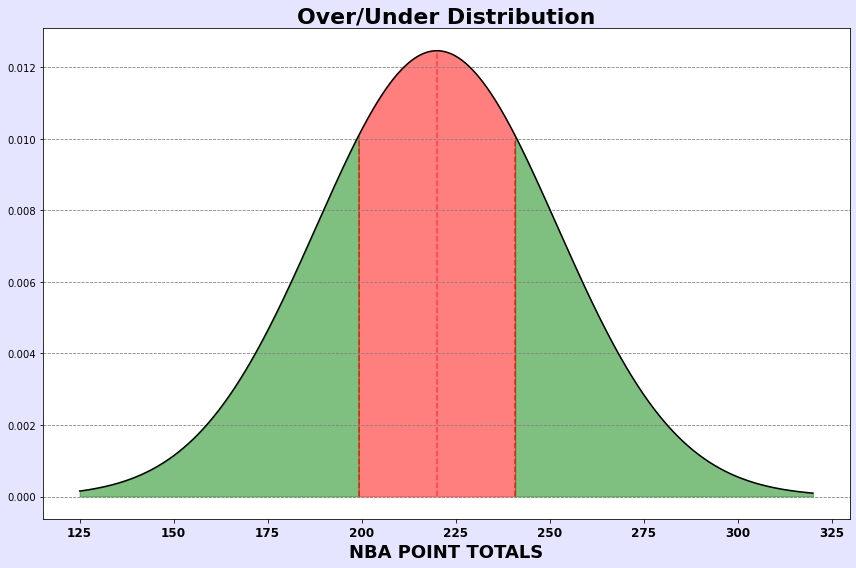

In [1578]:
import scipy.stats as stats
spread = 220
spread_dist = stats.norm(spread, ml_df['totals'].std() )
support = np.linspace(125, 320, 7153 )
fig,ax = plt.subplots(figsize=(12,8))
compare_pdf = spread_dist.pdf(support)



kappa_under =spread - (ml_df['totals'].std() *.65)
kappa_over = spread + (ml_df['totals'].std() *.65)

fill_b = np.arange(kappa_under,kappa_over )

ax.plot(support, compare_pdf, color='black', label='<-- Over/Under -->')
#ax.fill(support, compare_pdf, color='blue', alpha=0.2)



ax.axvline(spread, ymin=.046, ymax = .95, color='r', alpha = .5, linestyle = '--')
ax.set_title('Over/Under Distribution', fontsize=22,weight = 'bold' )
fig.patch.set_alpha(0.1)
fig.set_facecolor('b')
plt.xticks(fontsize = 12, weight = 'bold')
ax.axvline(x = kappa_over  , ymin=.046, ymax = .77, color='r', alpha = .75, linestyle = '--')
ax.axvline(x =kappa_under , ymin=.046, ymax = .77, color='r', alpha = .75, linestyle = '--')
#ax.legend()

#ax.fill_between(spread - (ml_df['totals'].std() *.65),spread + (ml_df['totals'].std() *.65),  compare_pdf)


#ax.axvspan(spread - (ml_df['totals'].std() *.65),  spread + (ml_df['totals'].std() *.65), ymin=.05,   alpha=0.2, color='red')

#plt.fill_between(fill_b,compare_pdf, color='r')

ax.fill_between(support,compare_pdf,  where=(support > kappa_under) & (support  < kappa_over), alpha=0.5, color ='r')

ax.fill_between(support,compare_pdf,  where=(support < kappa_under) & (support  < kappa_over), alpha=0.5, color ='g')

ax.fill_between(support,compare_pdf,  where=(support > kappa_under) & (support  > kappa_over), alpha=0.5, color ='g')

ax.yaxis.grid(color='gray', linestyle='dashed')



plt.xlabel("NBA POINT TOTALS", fontsize=18, weight = 'bold')
plt.tight_layout()

#plt.savefig('images/bet_dist.jpg', dpi=100, format='jpg')
    

In [1476]:
['Total_pts_x','totals', 'kappa_1', 'kappa_2', 'kappa_3',
       'k_1_under', 'k_1_over', 'k_2_under', 'k_2_over', 'k_3_under',
       'k_3_over', 'k_4_under', 'k_4_over', 'k_7_under', 'k_7_over', 'k_under',
       'k_over']

Index(['Total_pts_x', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%',
       'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', '+/-', 'Team', 'MIN_2', 'PTS_2', 'FGM_2', 'FGA_2', 'FG%_2',
       '3PM_2', '3PA_2', '3P%_2', 'FTM_2', 'FTA_2', 'FT%_2', 'OREB_2',
       'DREB_2', 'REB_2', 'AST_2', 'STL_2', 'BLK_2', 'TOV_2', 'PF_2', '+/-_2',
       'Team_2', 'Total_pts_y', 'home', 'visitor', 'Open', 'Close', 'Open_2',
       'Close_2', 'over_under', 'totals', 'kappa_1', 'kappa_2', 'kappa_3',
       'k_1_under', 'k_1_over', 'k_2_under', 'k_2_over', 'k_3_under',
       'k_3_over', 'k_4_under', 'k_4_over', 'k_7_under', 'k_7_over', 'k_under',
       'k_over'],
      dtype='object')

In [1749]:
compare_df = new_df[['Total_pts_x','totals', 'kappa_1', 'kappa_2', 'kappa_3',
       'k_1_under', 'k_1_over', 'k_2_under', 'k_2_over', 'k_3_under',
       'k_3_over']]

In [1750]:
compare_df.reset_index(inplace=True)

In [1751]:
compare_df.index.values

array([   0,    1,    2, ..., 1428, 1429, 1430])

In [1489]:
correct_games = (325 * .64)

In [1490]:
incorrect_games = (325 * .36)

In [1491]:
winnings = correct_games * 100

In [1492]:
losings = incorrect_games * -115

In [1496]:
over_all_winnings = winnings +losings

In [1497]:
over_all_winnings 

7345.0

# Plotting Predicted Scores vs Actual Score vs Betting Total

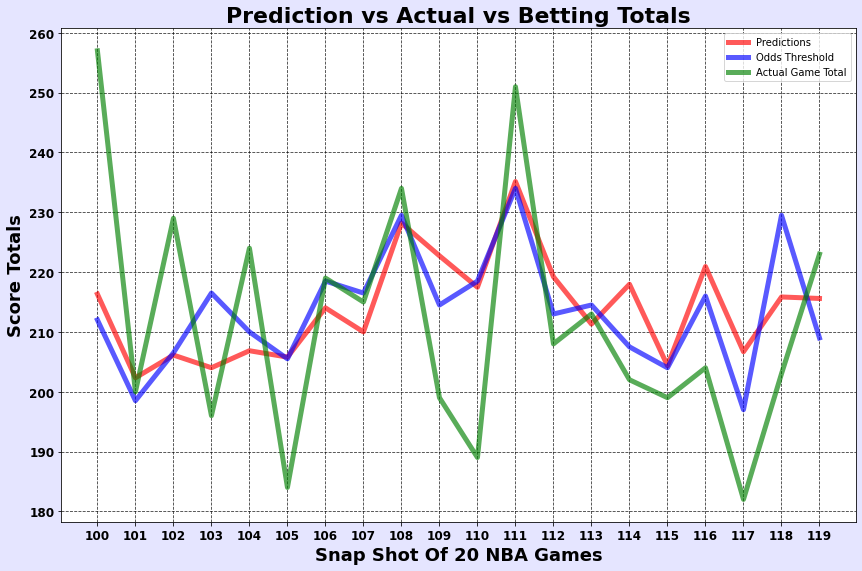

In [1754]:
#Creating a snap shot of 25 different nba games for the predicted, betting total, and actual game totals
preds = compare_df['predicted'][100:120]
vegas_Totals = compare_df['totals'][100:120]
game_totals = compare_df['Total_pts_x'][100:120]



fig,ax = plt.subplots(figsize=(12,8))

ax.plot(compare_df.index.values[100:120],preds, color='r', label='Predictions', linewidth=5, alpha =.65)
ax.plot(compare_df.index.values[100:120],vegas_Totals, color='b', label='Odds Threshold', linewidth=5, alpha =.65)
ax.plot(compare_df.index.values[100:120],game_totals, color='g', label='Actual Game Total', linewidth=5, alpha =.65)
plt.xlabel("Snap Shot Of 20 NBA Games", fontsize=18, weight = 'bold')

ax.set_title('Prediction vs Actual vs Betting Totals', fontsize=22,weight = 'bold' )


ax.legend()

fig.patch.set_alpha(0.1)
fig.set_facecolor('b')

plt.ylabel("Score Totals", fontsize=18, weight = 'bold')

ax.yaxis.grid(color='black', linestyle='dashed',alpha =.8)
ax.xaxis.grid(color='black', linestyle='dashed', alpha =.8)
plt.tight_layout()


plt.xticks(np.arange(100,120), fontsize = 12, weight = 'bold')
plt.yticks(fontsize = 12, weight = 'bold')
plt.show()


#plt.savefig('images/pred_vs_actual.jpg', dpi=50, format='jpg')

In [1566]:
325 * 100

32500

# Validating with a test set 

In [1821]:
#reading in pandas df
validating_model = pd.read_csv('data/ready_for_ml_7.csv')

#dropping 'Unnamed: 0' that should not be there
validating_model.drop('Unnamed: 0', inplace = True, axis = 1)

#reversing the dataframe
validating_model = validating_model.iloc[::-1]

In [1822]:
#reseting the index and dropping the old index and dropping NA values
validating_model.reset_index(inplace= True)
validating_model.dropna(inplace = True)
validating_model.drop('index', inplace = True, axis = 1)



In [1825]:
#Creating our X predictors 
X = validating_model[['PTS', 'FGM', 'FGA', 'FG%','3PA', '3P%', 'FTM',
       'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       '+/-', 'PTS_2', 'FGM_2', 'FGA_2', 'FG%_2',
       '3PM_2', '3PA_2', '3P%_2', 'FT%_2', 'OREB_2',
       'DREB_2', 'REB_2', 'AST_2', 'STL_2', 'BLK_2', 'TOV_2', 'PF_2', '+/-_2']]

#creating the y (target variable)
y = validating_model['Total_pts']


## Validating Set will be the 1000 most recent games

In [1834]:
#Creating the temp and validating X- predictors

X_temp = X.iloc[:6280]
X_val = X.iloc[6280:]

y_temp = y.iloc[:6280]
y_val = y.iloc[6280:]



6408    178
6409    236
6410    227
6411    216
6412    248
       ... 
7276    215
7277    258
7278    216
7279    253
7280    229
Name: Total_pts, Length: 873, dtype: int64

In [1838]:
## scale the features
scaler = RobustScaler()

# creating the scaled X predictors for the training/ Temp set
x_scaled_temp = scaler.fit_transform(X_temp)


# creating the scaled X predictors for the validating set
x_scaled_val = scaler.fit_transform(X_val)

# train test split with the testing data

In [1839]:
X_train_test, X_test_test, y_train_test, y_test_test = train_test_split(x_scaled_temp, y_temp, test_size=0.2, random_state=42)

In [1883]:
rf_test = RandomForestRegressor(n_estimators = 250, min_samples_leaf =2,max_features=10, random_state=8, n_jobs=-1) 
rf_fit_test = rf_test.fit(x_scaled_temp, y_temp)
y_pred_test = rf_fit_test.predict(x_scaled_val)




print (mean_absolute_error(y_pred_test, y_val))
print (rmse_error(y_pred_test, y_val))

17.163787100070607
466.6865901442536


# Creating new DF to see profit from Kappas for test/ validation data

In [1847]:
#creating the play DF from y_test because y_test maintains the same index as the original 
#DF so that we can combine with the original DF to compare the Kappas to the games the y test refers to
to_combine_test = pd.DataFrame(y_val)


#Creating new_df, which is the original df merged on index with the play DF
test_df = pd.merge(to_combine_test, validating_model, left_index=True, right_index=True)

#creating the compare test to go into the Kappa function
compare_test = test_df[['Total_pts_x','totals', 'kappa_1', 'kappa_2', 'kappa_3',
       'k_1_under', 'k_1_over', 'k_2_under', 'k_2_over', 'k_3_under',
       'k_3_over']]  

In [1849]:
compare_test['predicted'] = y_pred_test

compare_test

/Users/amossworkcomp/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Total_pts_x,totals,kappa_1,kappa_2,kappa_3,k_1_under,k_1_over,k_2_under,k_2_over,k_3_under,k_3_over,predicted
6408,178,218.0,4.13165,6.197475,8.263299,214.0,222.0,212.0,224.0,210.0,226.0,212.715803
6409,236,233.5,4.13165,6.197475,8.263299,229.0,238.0,227.0,240.0,225.0,242.0,220.771967
6410,227,220.0,4.13165,6.197475,8.263299,216.0,224.0,214.0,226.0,212.0,228.0,207.271387
6411,216,224.0,4.13165,6.197475,8.263299,220.0,228.0,218.0,230.0,216.0,232.0,221.895138
6412,248,230.5,4.13165,6.197475,8.263299,226.0,235.0,224.0,237.0,222.0,239.0,221.300462
...,...,...,...,...,...,...,...,...,...,...,...,...
7276,215,231.0,4.13165,6.197475,8.263299,227.0,235.0,225.0,237.0,223.0,239.0,216.117289
7277,258,221.5,4.13165,6.197475,8.263299,217.0,226.0,215.0,228.0,213.0,230.0,210.245994
7278,216,223.5,4.13165,6.197475,8.263299,219.0,228.0,217.0,230.0,215.0,232.0,218.055033
7279,253,232.0,4.13165,6.197475,8.263299,228.0,236.0,226.0,238.0,224.0,240.0,220.239565


# Calculating profit for the testing Data
- 0.516 win Percentage
- $-3,515 return
- 870 games

In [1850]:
#remember we had to use the compare DF so that the totals columns are related to the same games we predicted--- Profit with the testing data- -3,515
def calculating_profit():
    
    win = []
    lost = []
    zipped = zip(compare_test['Total_pts_x'], compare_test['predicted'], compare_test['totals'])
    for x in zipped:
        
        if x[0] > x[2] and x[1] > x[2]:
            win.append(100)
        if x[0] < x[2] and x[1] < x[2]:
            win.append(100)
        if x[0] > x[2] and x[1] < x[2]:
            lost.append(-115)
        if x[0] < x[2] and x[1] > x[2]:
            lost.append(-115)
            
        
       

    print(len(lost))
    print(len(win))
    print(len(win) / (len(lost) + len(win) ))
    
     
    profit = 0
    for num in win:
        profit += num
    
    for num in lost:
        profit += num
    
   
    
    return profit


print (calculating_profit())  

421
449
0.5160919540229885
-3515
-3515


# Introducing Kappas for the testing Data

In [1894]:
def kappa_3():
    
    '''
    Returns the winning percentage when implementing kappa 3 thresholds
    '''
    #zipping together the
    
    pred_kappa3_under = zip(compare_test['predicted'], compare_test['Total_pts_x'], compare_test['k_3_under'], compare_test['totals'])
    #print(pred_kappa1_under)
    pred_kappa3_over = zip(compare_test['predicted'], compare_test['Total_pts_x'], compare_test['k_3_over'], compare_test['totals'])
    lost_list = []
    
    win = []
    for x in pred_kappa3_under:
        #print (x)
        #x[0] = predicted score
        #x[1] = actual total for that game
        #x[2] = the under kappa
        if x[0]  < x[2] and x[1] < x[3]:
            
            win.append('under')
            
        if x[0]  < x[2] and  x[1] > x[3]:
            
            lost_list.append('lost') 
            
    for x in pred_kappa3_over:
        
        if x[0]  > x[2] and  x[1] > x[3]:
            
            win.append('over')
        
        if x[0]  > x[2] and  x[1] < x[3]:
            
            lost_list.append('lost')
    print(len(win) + len(lost_list))
    print(len(win))
    print(len(lost_list))
    
    
    
    return len(win) / (len(lost_list) +len(win))

print (kappa_3())


519
262
257
0.5048169556840078


In [1863]:
#reseting index because of some missing values
compare_test.reset_index(inplace = True)


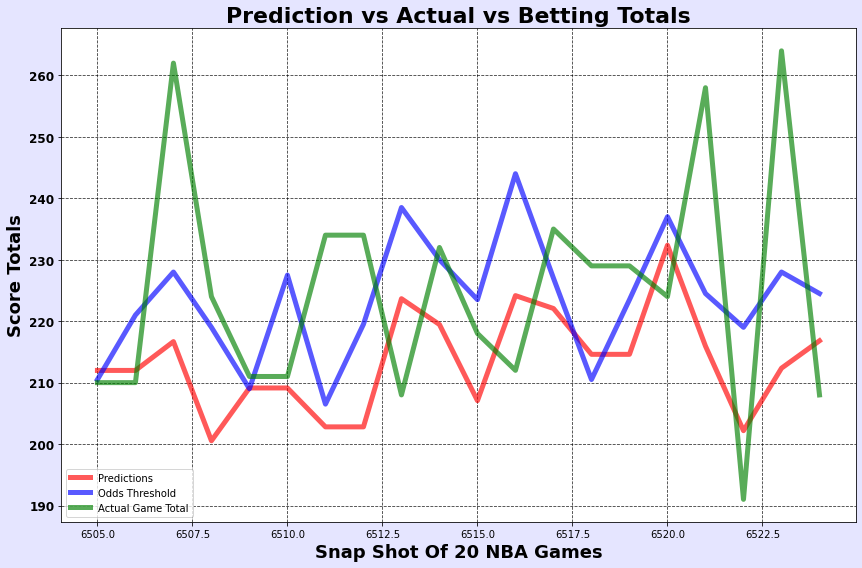

In [1896]:
#Creating a snap shot of 25 different nba games for the predicted, betting total, and actual game totals
preds = compare_test['predicted'][97:117]
vegas_Totals = compare_test['totals'][97:117]
game_totals = compare_test['Total_pts_x'][97:117]



fig,ax = plt.subplots(figsize=(12,8))

ax.plot(compare_test.index.values[97:117],preds, color='r', label='Predictions', linewidth=5, alpha =.65)
ax.plot(compare_test.index.values[97:117],vegas_Totals, color='b', label='Odds Threshold', linewidth=5, alpha =.65)
ax.plot(compare_test.index.values[97:117],game_totals, color='g', label='Actual Game Total', linewidth=5, alpha =.65)
plt.xlabel("Snap Shot Of 20 NBA Games", fontsize=18, weight = 'bold')

ax.set_title('Prediction vs Actual vs Betting Totals', fontsize=22,weight = 'bold' )


ax.legend()

fig.patch.set_alpha(0.1)
fig.set_facecolor('b')

plt.ylabel("Score Totals", fontsize=18, weight = 'bold')

ax.yaxis.grid(color='black', linestyle='dashed',alpha =.8)
ax.xaxis.grid(color='black', linestyle='dashed', alpha =.8)
plt.tight_layout()


#plt.xticks(np.arange(97,117), fontsize = 12, weight = 'bold')
plt.yticks(fontsize = 12, weight = 'bold')
plt.show()


# Trying out the extra trees regressor

In [1888]:
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.ensemble import AdaBoostRegressor

In [1884]:
extra_trees = ExtraTreesRegressor()
extra_trees_fit = extra_trees.fit(x_scaled_temp, y_temp)
extra_trees_predict = extra_trees_fit.predict(x_scaled_val)

In [1887]:
print (mean_absolute_error(extra_trees_predict, y_val))
print (rmse_error(extra_trees_predict, y_val))

17.18656357388316
471.83314765177556


In [ ]:



print (mean_absolute_error(y_pred_test, y_val))
print (rmse_error(y_pred_test, y_val))

# Trying out Adaboost, but it did not perform better than RandomForests on the testing data

In [1890]:
regr = AdaBoostRegressor(random_state=0, n_estimators=100)
regr.fit(x_scaled_temp, y_temp)
y_pred_ada = regr.predict(x_scaled_val)
print (rmse_error(y_pred_ada, y_val))
print (mean_absolute_error(y_pred_ada, y_val))

447.25634408755604
16.666105536480025


In [1891]:
#creating the play DF from y_test because y_test maintains the same index as the original 
#DF so that we can combine with the original DF to compare the Kappas to the games the y test refers to
to_combine_test = pd.DataFrame(y_val)


#Creating new_df, which is the original df merged on index with the play DF
test_df = pd.merge(to_combine_test, validating_model, left_index=True, right_index=True)

#creating the compare test to go into the Kappa function
compare_test = test_df[['Total_pts_x','totals', 'kappa_1', 'kappa_2', 'kappa_3',
       'k_1_under', 'k_1_over', 'k_2_under', 'k_2_over', 'k_3_under',
       'k_3_over']]  

In [1892]:
compare_test['predicted'] = y_pred_test

compare_test

/Users/amossworkcomp/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Total_pts_x,totals,kappa_1,kappa_2,kappa_3,k_1_under,k_1_over,k_2_under,k_2_over,k_3_under,k_3_over,predicted
6408,178,218.0,4.13165,6.197475,8.263299,214.0,222.0,212.0,224.0,210.0,226.0,214.662667
6409,236,233.5,4.13165,6.197475,8.263299,229.0,238.0,227.0,240.0,225.0,242.0,220.237119
6410,227,220.0,4.13165,6.197475,8.263299,216.0,224.0,214.0,226.0,212.0,228.0,208.482781
6411,216,224.0,4.13165,6.197475,8.263299,220.0,228.0,218.0,230.0,216.0,232.0,220.032378
6412,248,230.5,4.13165,6.197475,8.263299,226.0,235.0,224.0,237.0,222.0,239.0,224.162719
...,...,...,...,...,...,...,...,...,...,...,...,...
7276,215,231.0,4.13165,6.197475,8.263299,227.0,235.0,225.0,237.0,223.0,239.0,216.166400
7277,258,221.5,4.13165,6.197475,8.263299,217.0,226.0,215.0,228.0,213.0,230.0,210.315941
7278,216,223.5,4.13165,6.197475,8.263299,219.0,228.0,217.0,230.0,215.0,232.0,217.476473
7279,253,232.0,4.13165,6.197475,8.263299,228.0,236.0,226.0,238.0,224.0,240.0,218.946052
